# `CAR PRICE PREDICTION USING LINEAR REGRESSION AND OTHERS ALGORITHMS`

# Importing the libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

# Problem Statement

Here we have the Car details along with its price. Based on the given data, we going to predict the price of the Car.

# Defining the dataset

Link: https://drive.google.com/file/d/18xxy7kEGzp3vAwsA7QtrjyAwhffPiowo/view?usp=sharing

**PLEASE DOWNLOAD THE FILE FROM THE LINK AND PASTE THE LOCATION OF THE FILE IN THE BELOW**

In [45]:
df = pd.read_csv('/content/CarPrice_Assignment (2).csv')

# EDA - Exploratory Data Analysis (DE, DM, DC, DV)

In [46]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [48]:
df.shape

(205, 26)

In [49]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [50]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [53]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [54]:
df.drop('car_ID',axis=1,inplace=True) # car_ID is not going to help us in prediction

In [55]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [56]:
df.CarName.nunique()

147

In [57]:
df.CarName[0]

'alfa-romero giulia'

In [58]:
re.sub(' .*','',df.CarName[0])

'alfa-romero'

In [59]:
lis = []
for i in range(len(df)):
  brand_name = re.sub(' .*','',df.CarName[i])
  lis.append(brand_name)

print(lis)

['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', '

In [60]:
df['CarName'] = pd.DataFrame(lis)

In [61]:
df.head(1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [62]:
df.CarName.nunique()

28

In [63]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In the above values, Some values having spelling mistake so we going to correct it now

In [64]:
'''
'maxda' -> 'mazda'
'Nissan' -> 'nissan'
'porcshce' -> 'porsche'
"toyouta" -> "toyota"
"vokswagen" & "vw" -> "volkswagen"
'''

'\n\'maxda\' -> \'mazda\'\n\'Nissan\' -> \'nissan\'\n\'porcshce\' -> \'porsche\'\n"toyouta" -> "toyota"\n"vokswagen" & "vw" -> "volkswagen"\n'

Replacing the wrong name to correct names....

In [65]:
df.CarName.replace(['maxda', 'Nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'],
                   ['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen'], inplace=True)

In [66]:
df.CarName.nunique()



22

we reduce our values to 22.


The above unique values in the column : CarName is reduced from  147 - 22 , So we can get more **ACCURACY** than before

#Performing ENCODING : 
 ~ Changing values from string to intergers in required columns.

  ~We can  also use LabelEncoding to change the values but here  i am using Ordinal Encoding.

In [67]:
le = OrdinalEncoder()
df['CarName']= le.fit_transform(df[['CarName']])
df['fueltype'] = le.fit_transform(df[['fueltype']])
df['aspiration'] = le.fit_transform(df[['aspiration']])
df['fueltype'] = le.fit_transform(df[['fueltype']])
df['doornumber'] = le.fit_transform(df[['doornumber']])
df['drivewheel'] = le.fit_transform(df[['drivewheel']])
df['enginelocation'] = le.fit_transform(df[['enginelocation']])
df['enginetype'] = le.fit_transform(df[['enginetype']])
df['cylindernumber'] = le.fit_transform(df[['cylindernumber']])
df['carbody'] = le.fit_transform(df[['carbody']])
df['fuelsystem'] = le.fit_transform(df[['fuelsystem']])

In [68]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0


# **ALL DATA ARE CLEANED**





In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    float64
 2   fueltype          205 non-null    float64
 3   aspiration        205 non-null    float64
 4   doornumber        205 non-null    float64
 5   carbody           205 non-null    float64
 6   drivewheel        205 non-null    float64
 7   enginelocation    205 non-null    float64
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    float64
 14  cylindernumber    205 non-null    float64
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    float64
 1

In [70]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.092793,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.092793,1.000000,-0.055049,0.011326,-0.150465,0.101473,-0.056639,0.054410,-0.013288,0.030733,...,-0.174513,0.104030,0.191301,-0.210031,0.088972,-0.109686,-0.151830,0.108458,0.119023,-0.262234
fueltype,0.194311,-0.055049,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.011326,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.150465,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,0.101473,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.056639,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.054410,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,-0.013288,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.030733,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


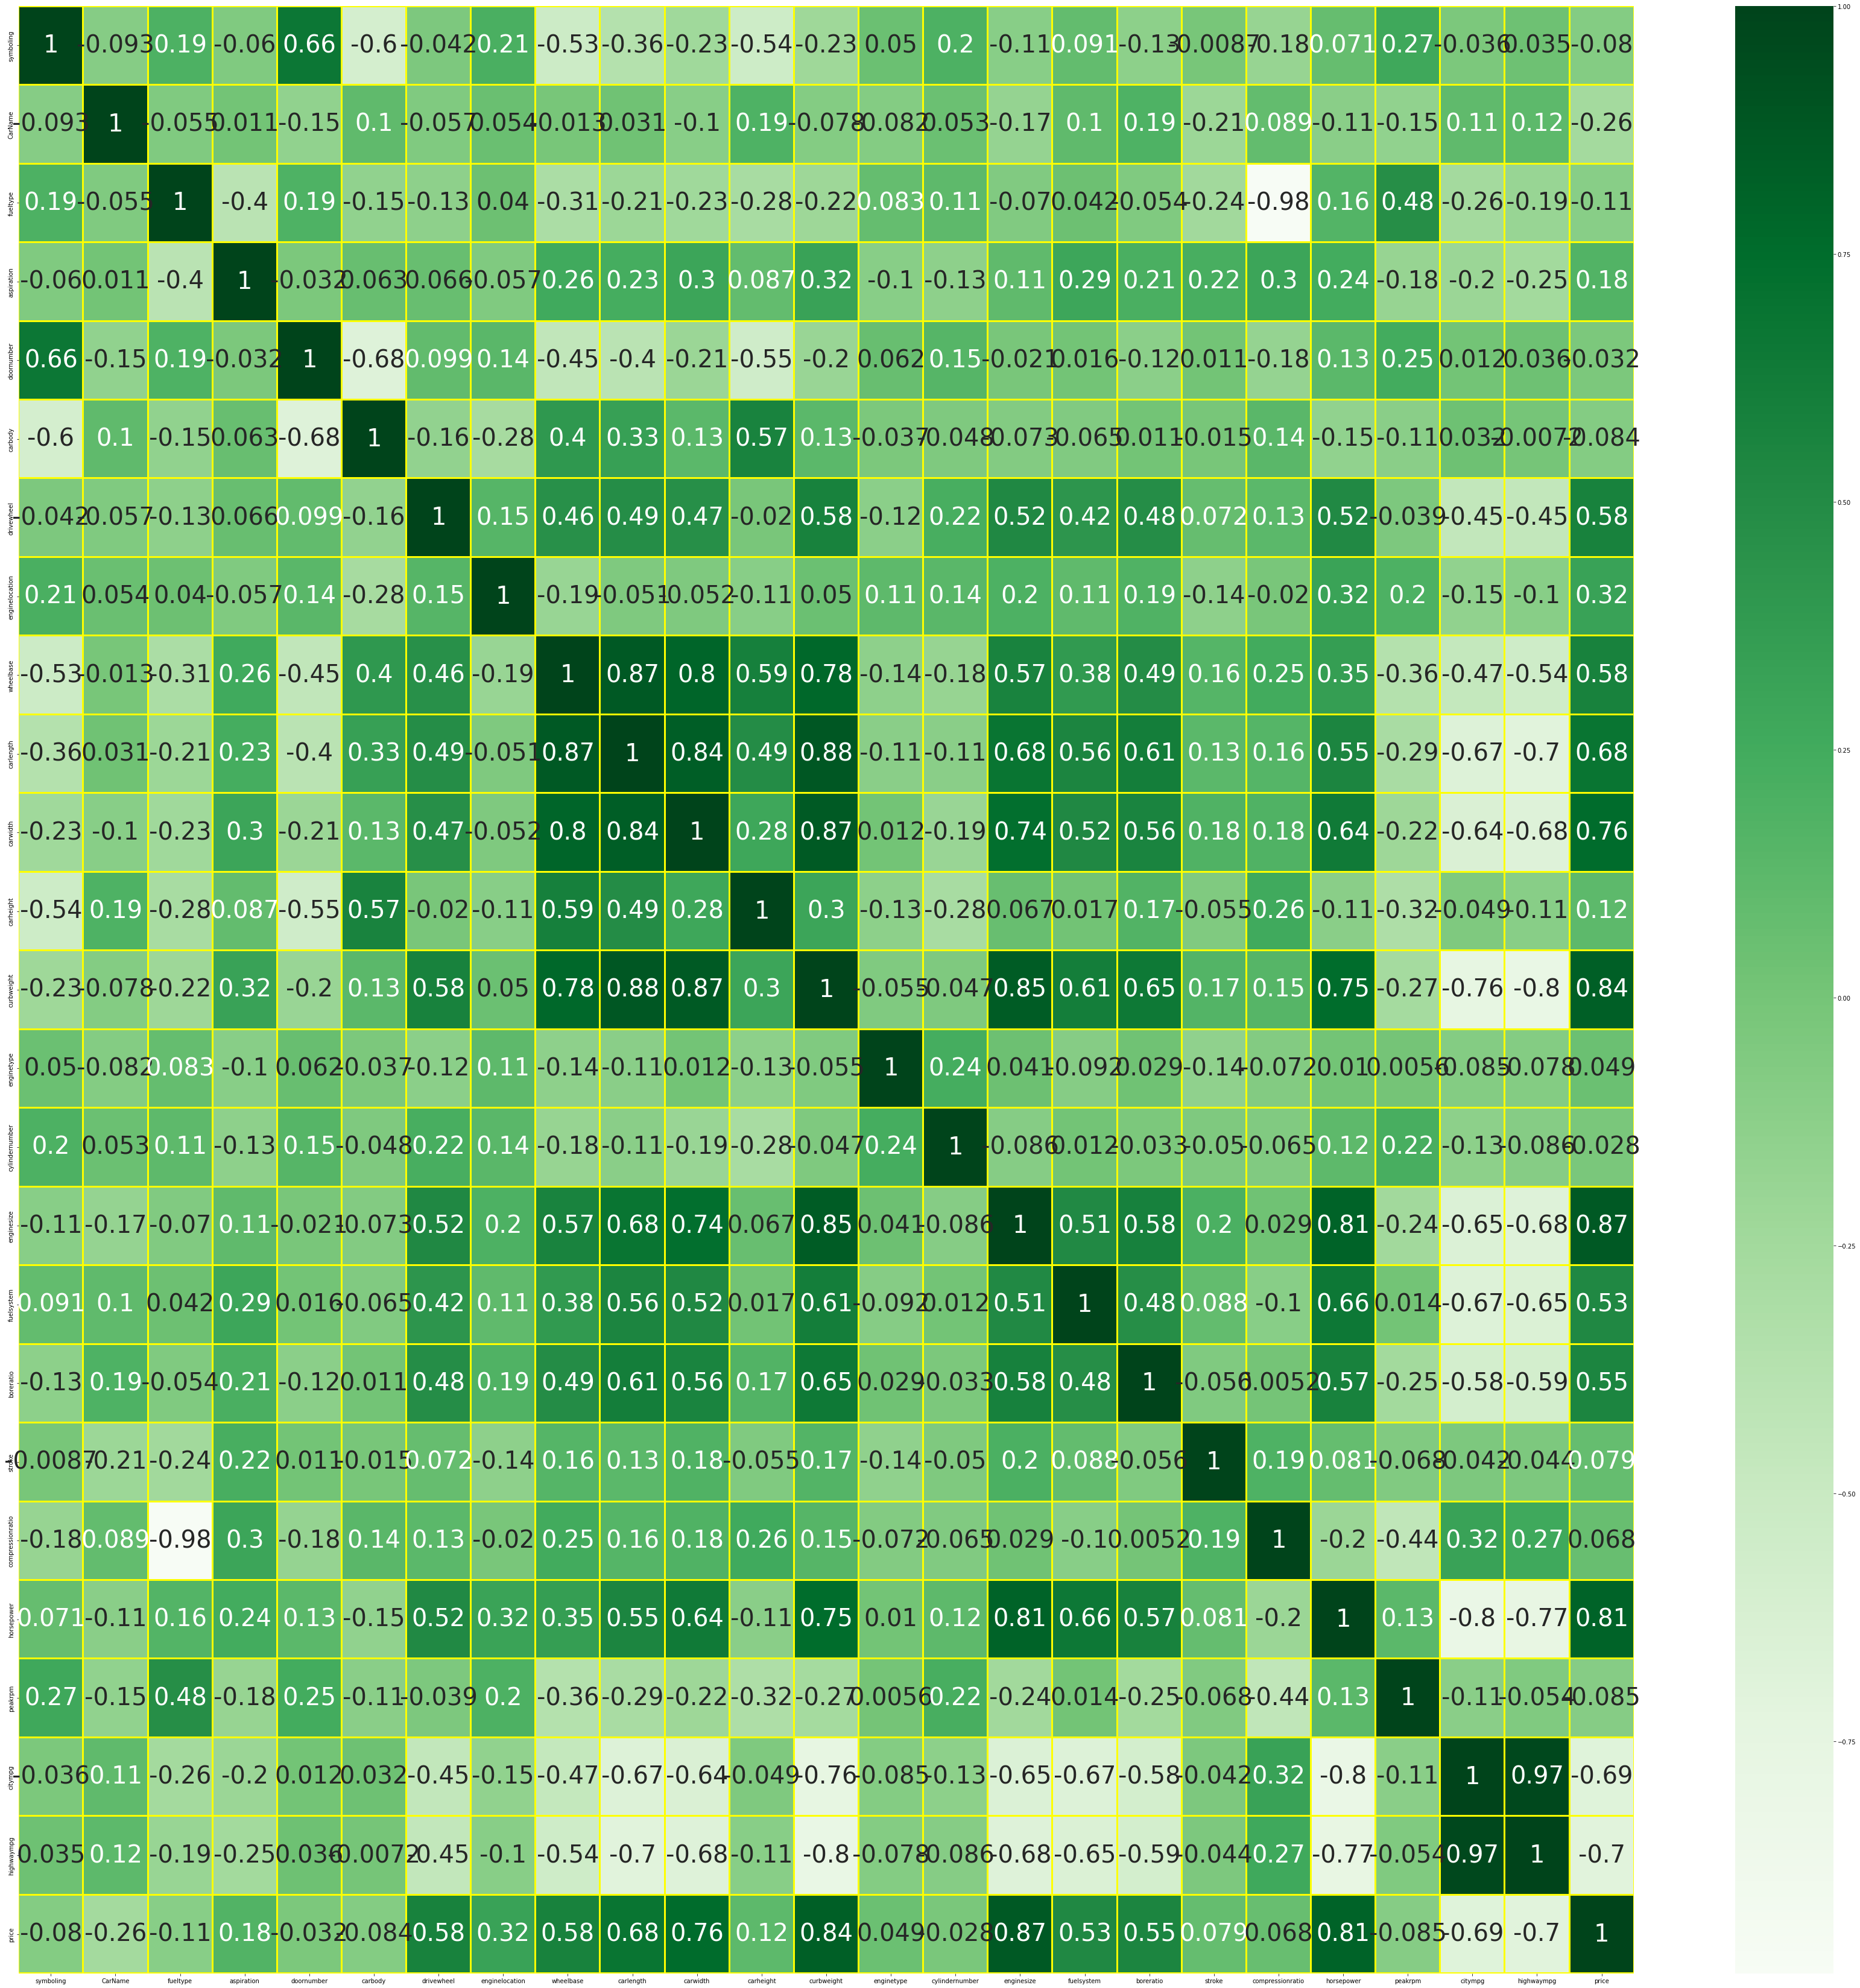

In [71]:
plt.figure(figsize=(60,60))
sns.heatmap(df.corr(), annot=True,linewidths = 2,linecolor = "yellow", cmap='Greens',annot_kws={'size': 40})

The pairplot diagram consumes more computation power and time , so i comment it out.

In [72]:
#sns.pairplot(df)

Scatter Plot for  symboling


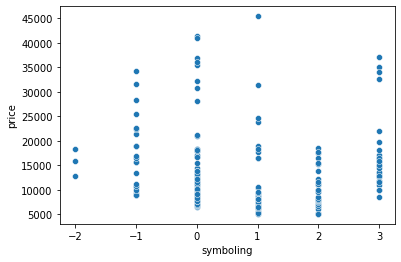

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  CarName


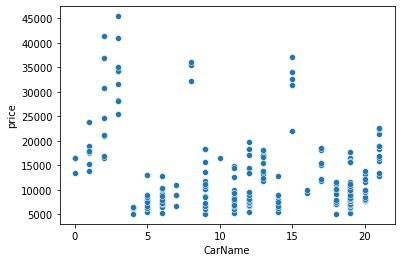

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  fueltype


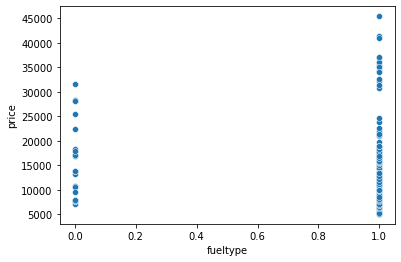

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  aspiration


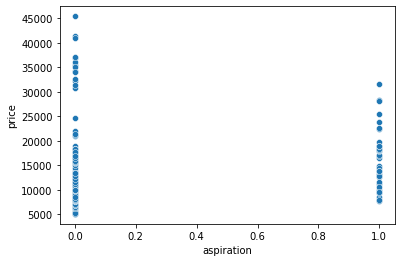

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  doornumber


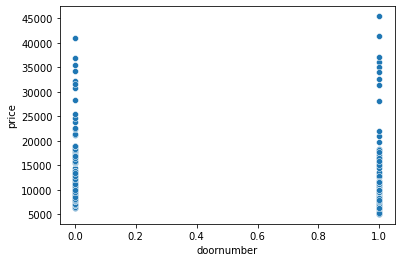

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  carbody


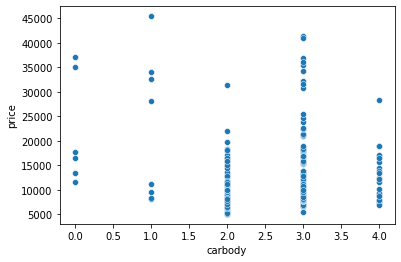

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  drivewheel


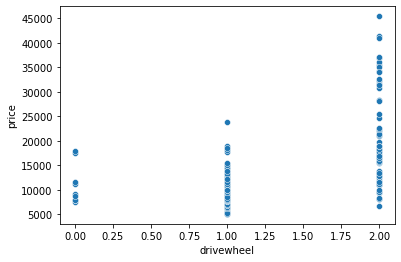

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  enginelocation


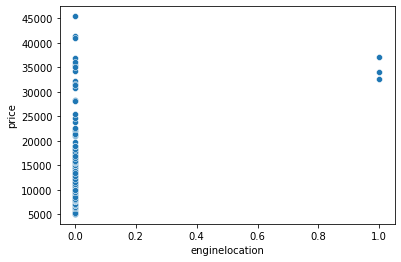

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  wheelbase


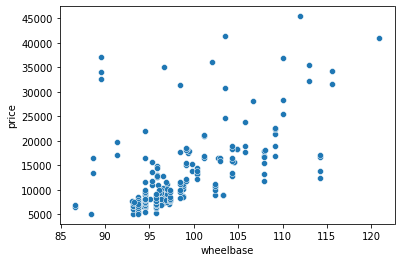

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  carlength


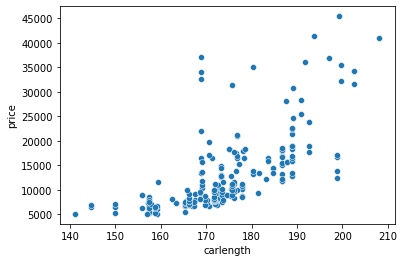

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  carwidth


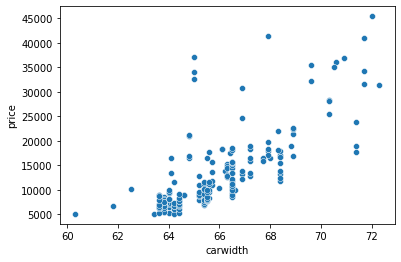

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  carheight


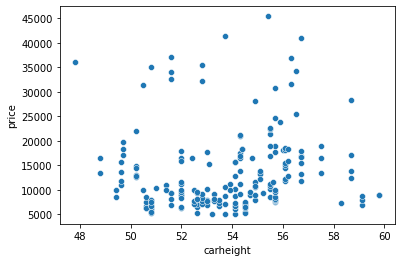

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  curbweight


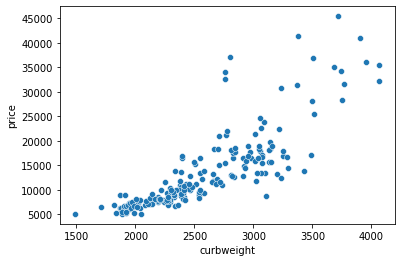

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  enginetype


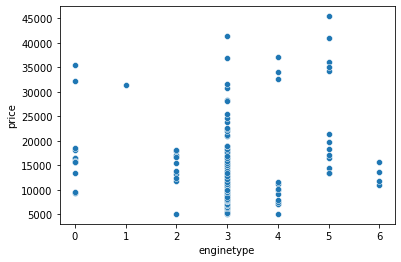

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  cylindernumber


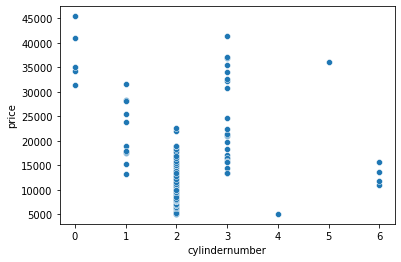

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  enginesize


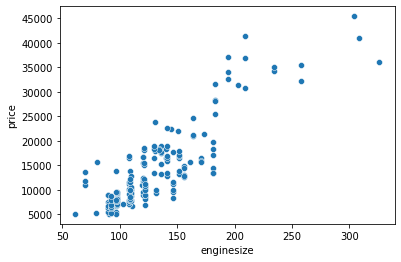

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  fuelsystem


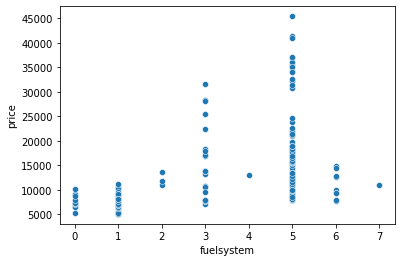

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  boreratio


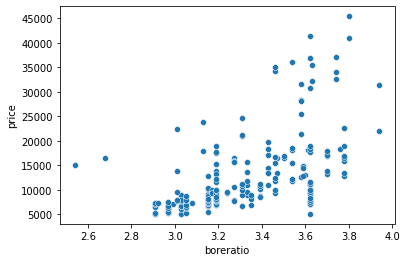

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  stroke


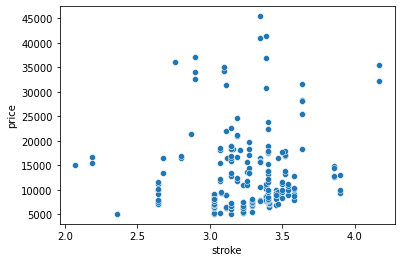

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  compressionratio


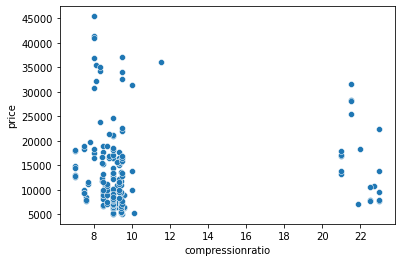

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  horsepower


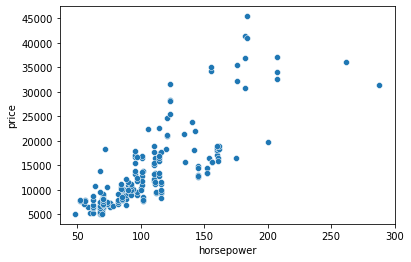

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  peakrpm


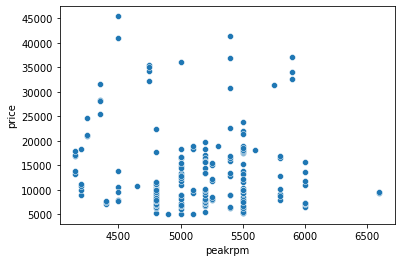

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  citympg


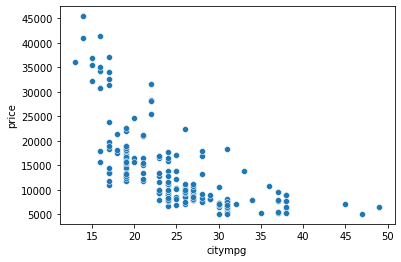

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Scatter Plot for  highwaympg


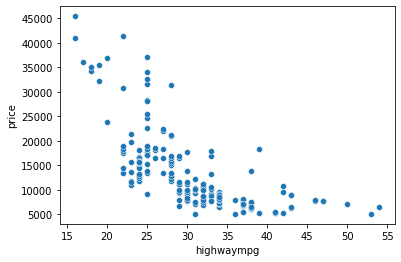

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [73]:
for i in df.drop('price',axis=1).columns:
    
    print("Scatter Plot for ",i)
    sns.scatterplot(x = df[i], y = df['price'])
    plt.show()
    print('-'*200)

Box Plot for  symboling


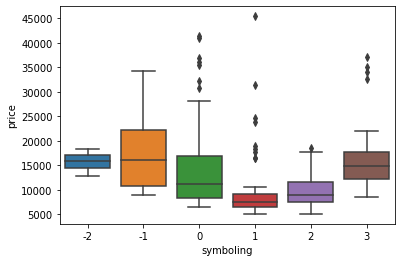

----------------------------------------------------------------------------------------------------
Box Plot for  CarName


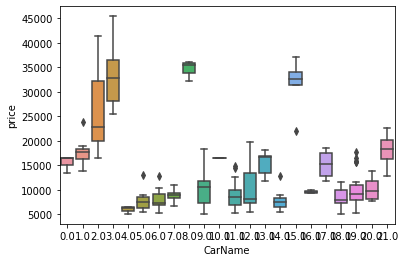

----------------------------------------------------------------------------------------------------
Box Plot for  fueltype


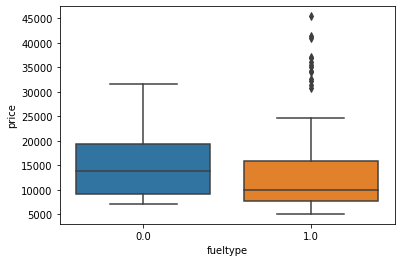

----------------------------------------------------------------------------------------------------
Box Plot for  aspiration


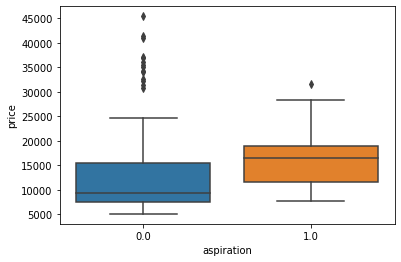

----------------------------------------------------------------------------------------------------
Box Plot for  doornumber


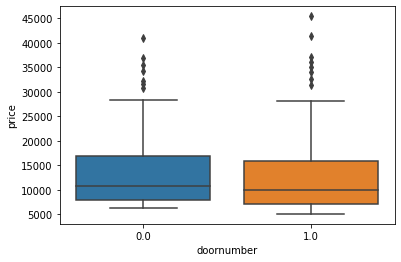

----------------------------------------------------------------------------------------------------
Box Plot for  carbody


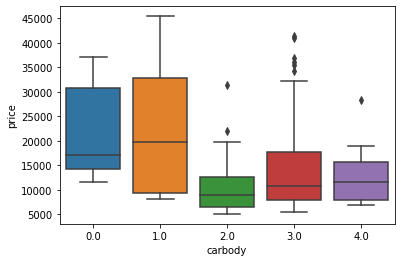

----------------------------------------------------------------------------------------------------
Box Plot for  drivewheel


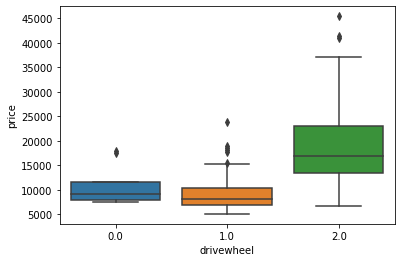

----------------------------------------------------------------------------------------------------
Box Plot for  enginelocation


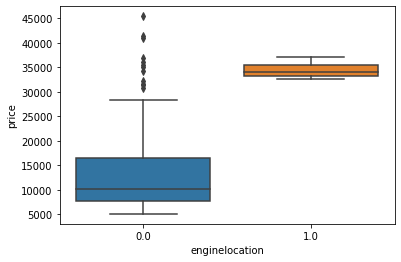

----------------------------------------------------------------------------------------------------
Box Plot for  wheelbase


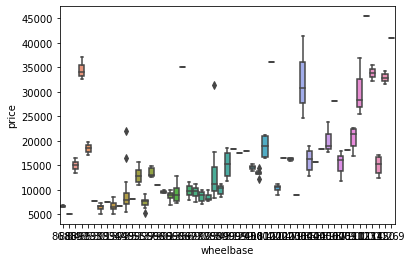

----------------------------------------------------------------------------------------------------
Box Plot for  carlength


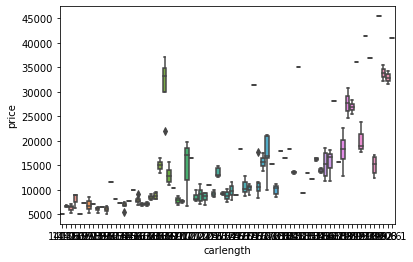

----------------------------------------------------------------------------------------------------
Box Plot for  carwidth


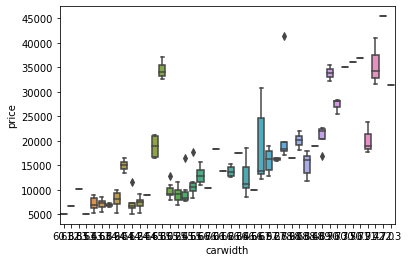

----------------------------------------------------------------------------------------------------
Box Plot for  carheight


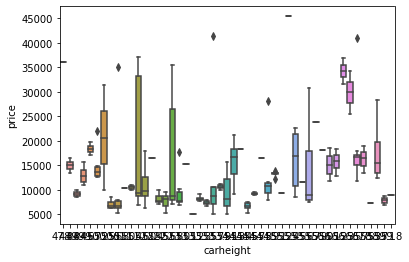

----------------------------------------------------------------------------------------------------
Box Plot for  curbweight


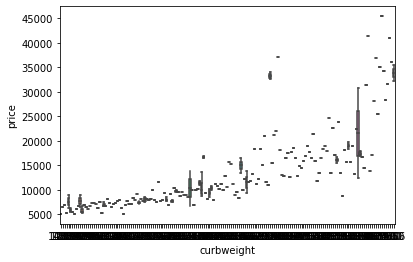

----------------------------------------------------------------------------------------------------
Box Plot for  enginetype


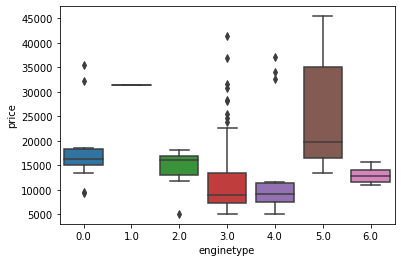

----------------------------------------------------------------------------------------------------
Box Plot for  cylindernumber


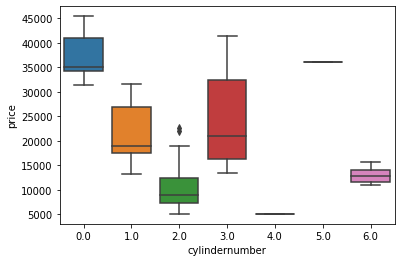

----------------------------------------------------------------------------------------------------
Box Plot for  enginesize


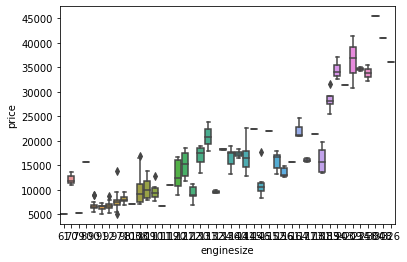

----------------------------------------------------------------------------------------------------
Box Plot for  fuelsystem


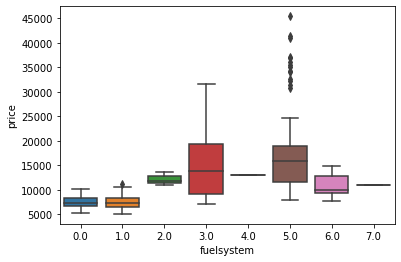

----------------------------------------------------------------------------------------------------
Box Plot for  boreratio


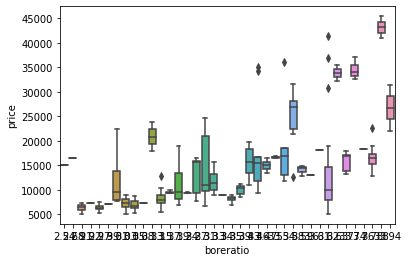

----------------------------------------------------------------------------------------------------
Box Plot for  stroke


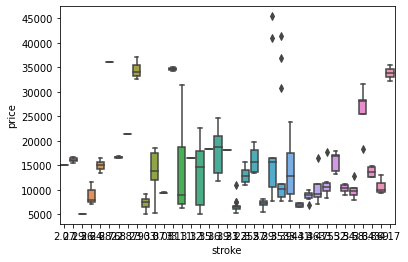

----------------------------------------------------------------------------------------------------
Box Plot for  compressionratio


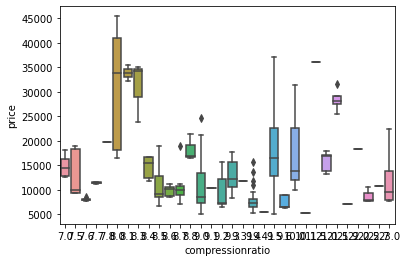

----------------------------------------------------------------------------------------------------
Box Plot for  horsepower


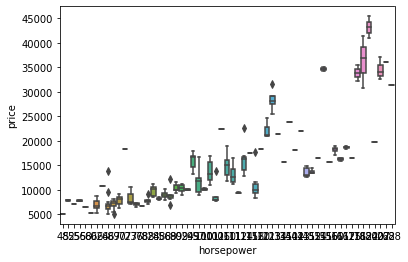

----------------------------------------------------------------------------------------------------
Box Plot for  peakrpm


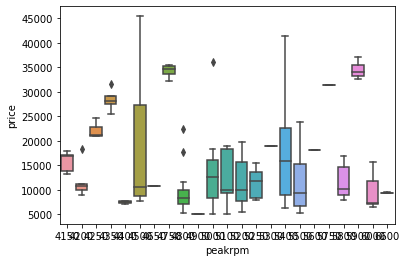

----------------------------------------------------------------------------------------------------
Box Plot for  citympg


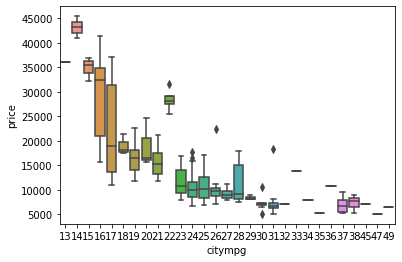

----------------------------------------------------------------------------------------------------
Box Plot for  highwaympg


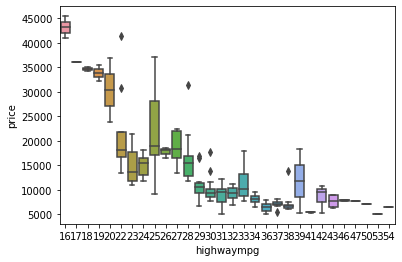

----------------------------------------------------------------------------------------------------


In [74]:
for i in df.drop('price',axis=1).columns:
    print("Box Plot for ",i)
    sns.boxplot(x = df[i], y = df['price'])
    plt.show()
    print('-'*100)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

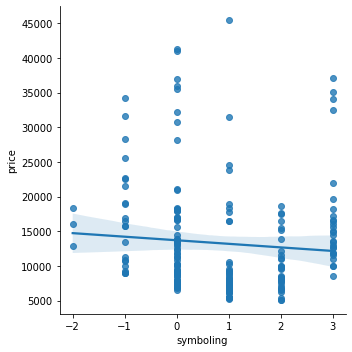

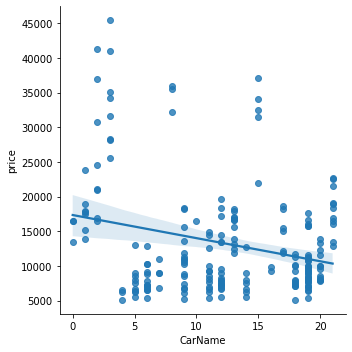

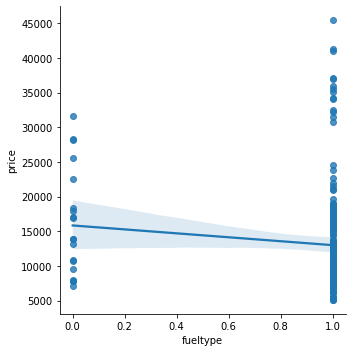

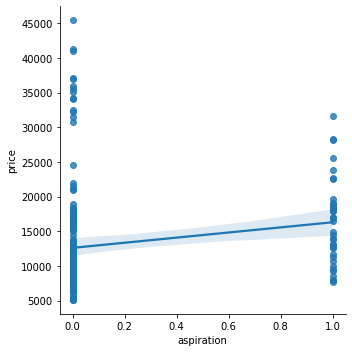

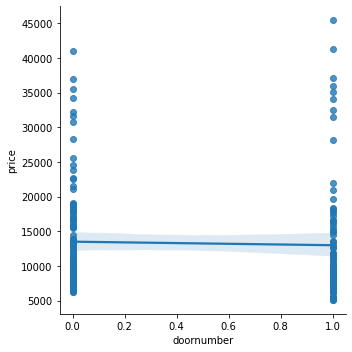

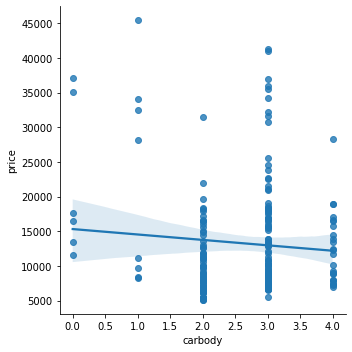

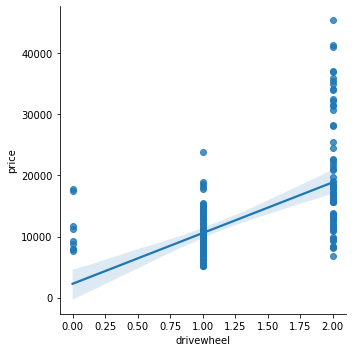

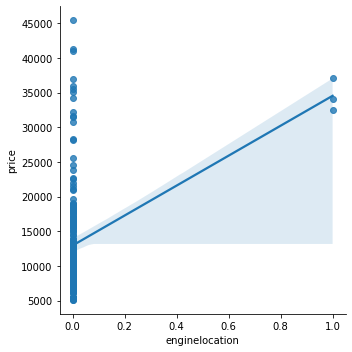

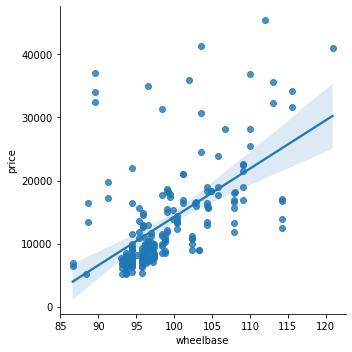

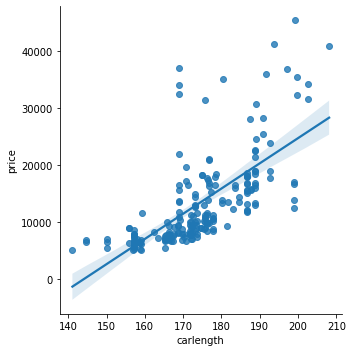

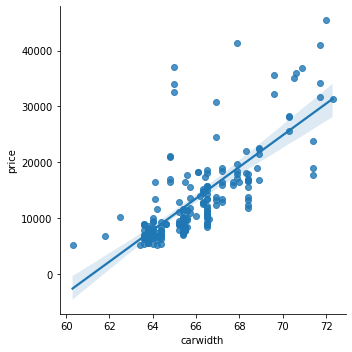

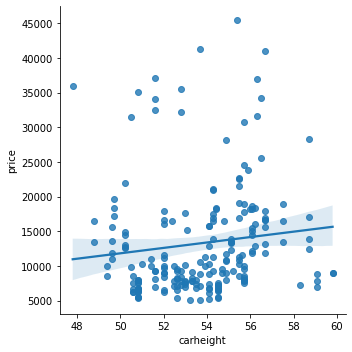

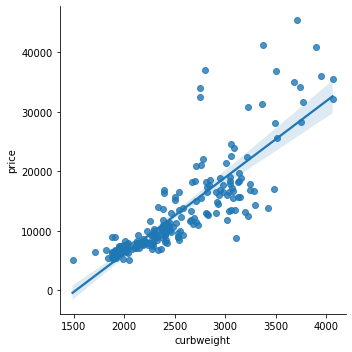

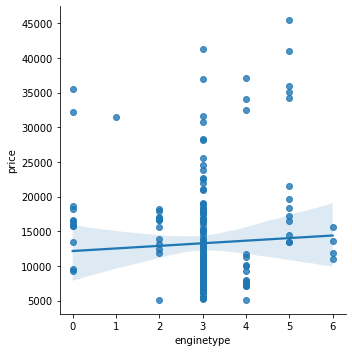

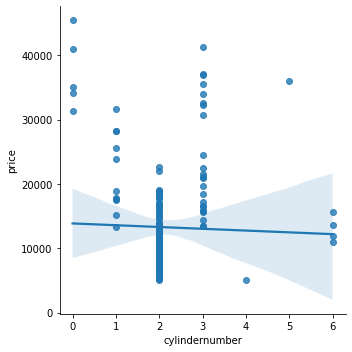

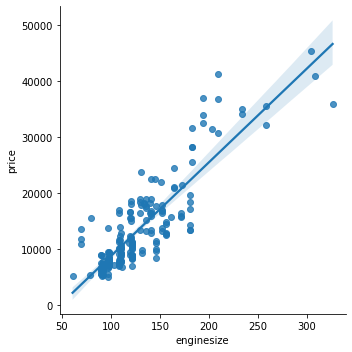

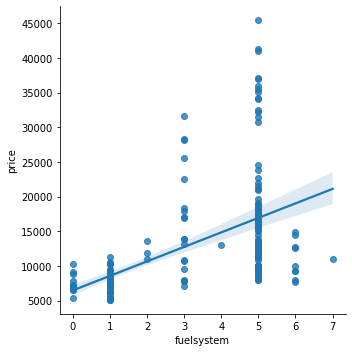

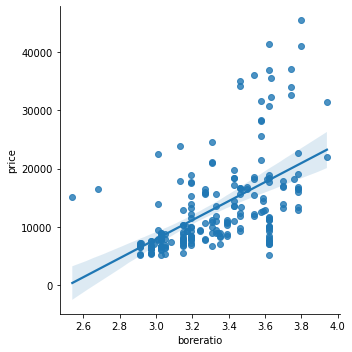

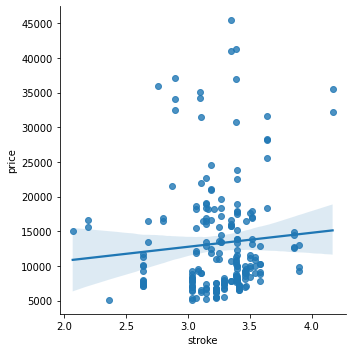

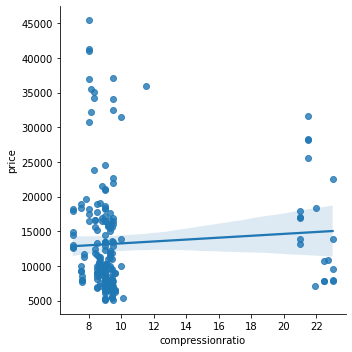

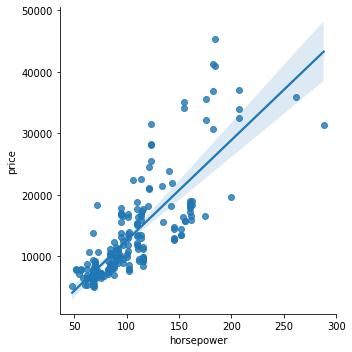

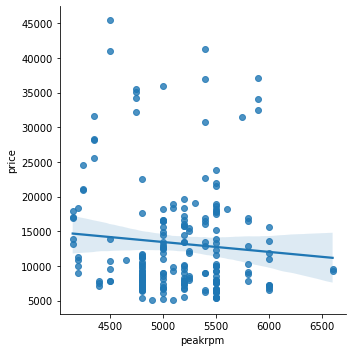

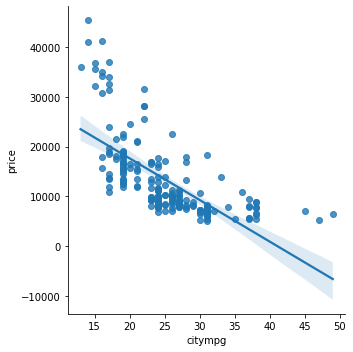

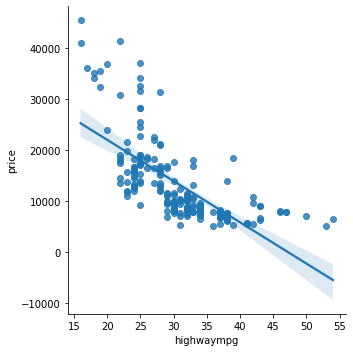

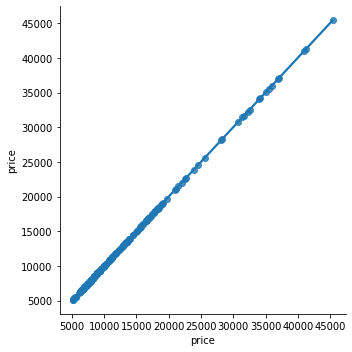

In [75]:
for col in df.columns: 
    if df[col].dtypes != 'object':
        sns.lmplot(data = df, x = col, y = 'price')

In [76]:
#To drop because uncorrelated to price: 
to_drop = ['peakrpm', 'compressionratio', 'stroke', 'symboling']   # droping this columns because these are uncorrelated to target
df.drop(df[to_drop], axis = 1, inplace = True)

# Saving the cleaned Dataset to csv file

In [77]:
df
df.to_csv('Cleaned_car_data.csv') # This CSV file will help in making GUI

Splitting the dataset

In [78]:
X= df.drop("price",axis=1)
y= df["price"]

In [79]:
X

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,130,5.0,3.47,111,21,27
1,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,130,5.0,3.47,111,21,27
2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,65.5,52.4,2823,5.0,3.0,152,5.0,2.68,154,19,26
3,1.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,66.2,54.3,2337,3.0,2.0,109,5.0,3.19,102,24,30
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,66.4,54.3,2824,3.0,1.0,136,5.0,3.19,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,55.5,2952,3.0,2.0,141,5.0,3.78,114,23,28
201,21.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,68.8,55.5,3049,3.0,2.0,141,5.0,3.78,160,19,25
202,21.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,55.5,3012,5.0,3.0,173,5.0,3.58,134,18,23
203,21.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,55.5,3217,3.0,3.0,145,3.0,3.01,106,26,27


In [80]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [81]:
len(X)

205

In [82]:
X.shape

(205, 20)

# **DATA SPLITTING**
 Spliting the dataset into Training & Testing sets

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=87)


#**Training the model**

# **LINEAR REGRESSION**

In [84]:
# Linear Regression


model = LinearRegression()
model.fit(X_train.values,y_train.values)
y_pred=model.predict(X_test.values)

#performance metrics
lr = r2_score(y_pred,y_test )
lr_mse = mean_squared_error(y_pred,y_test)
lr_rmse = np.sqrt(lr_mse)

print(f"r2_score : {lr}\n")

print(f"Mean Squared Error : {lr_mse}\n")

print(f"Root Mean Squared Error : {lr_rmse}\n")





r2_score : 0.9211812647161857

Mean Squared Error : 4429343.650033749

Root Mean Squared Error : 2104.6005915692767



The Model is Trained Well and we getting better Accuracy



---



---







Creating and Saving pickle file

In [85]:
import pickle
filename = 'LinearRegression.sav'
pickle.dump(model, open(filename,'wb'))
loaded_model  = pickle.load(open('LinearRegression.sav','rb'))

 *All the process are done *














# DEPLOYMENT OF THE MODEL :   


         * I CREATED A GUI WEB APPLICATION FOR THIS MODEL USING FLASK  AND I DEPLOYED IT IN HEROKU.

         * THE LINK FOR THE WEB APPLICATION IS :  https://car-price-predictor-332003.herokuapp.com/

         * Please copy & paste the link in your browser if the link not working

This project is done by a team **ML BOTS**

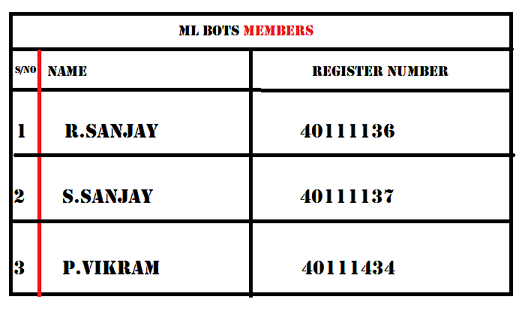

# **THANK YOU**